<a href="https://colab.research.google.com/github/socheata537/colab-homework/blob/main/KNN_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

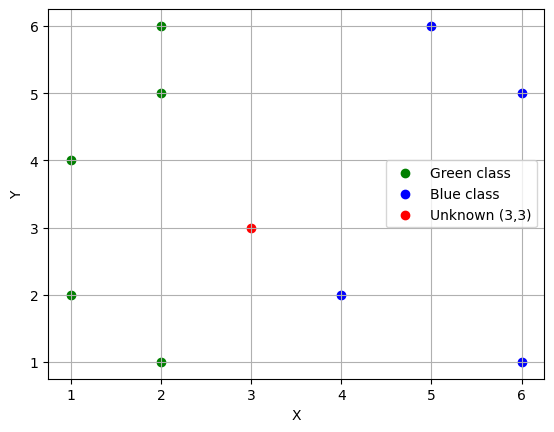

In [21]:
import numpy as np
import matplotlib.pyplot as plt

(1,4), (1,2), (2,1), (2,5), (2,6)

(4,2), (5,6), (6,5), (6,1)

(3,3)


# Green class
green = np.array([
    [1,4],
    [1,2],
    [2,1],
    [2,5],
    [2,6]
])

# Blue class
blue = np.array([
    [4,2],
    [5,6],
    [6,5],
    [6,1]
])

# Red (unknown) point
red = np.array([3,3])

plt.scatter(green[:,0], green[:,1], c='green', label='Green class')
plt.scatter(blue[:,0], blue[:,1], c='blue', label='Blue class')
plt.scatter(red[0], red[1], c='red', label='Unknown (3,3)')

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()



In [9]:
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2)**2))

distances = []

# Green distances
for point in green:
    d = euclidean_distance(red, point)
    distances.append(("green", point, d))

# Blue distances
for point in blue:
    d = euclidean_distance(red, point)
    distances.append(("blue", point, d))

# Sort by distance
distances.sort(key=lambda x: x[2])

distances


[('blue', array([4, 2]), np.float64(1.4142135623730951)),
 ('green', array([1, 4]), np.float64(2.23606797749979)),
 ('green', array([1, 2]), np.float64(2.23606797749979)),
 ('green', array([2, 1]), np.float64(2.23606797749979)),
 ('green', array([2, 5]), np.float64(2.23606797749979)),
 ('green', array([2, 6]), np.float64(3.1622776601683795)),
 ('blue', array([5, 6]), np.float64(3.605551275463989)),
 ('blue', array([6, 5]), np.float64(3.605551275463989)),
 ('blue', array([6, 1]), np.float64(3.605551275463989))]

In [29]:
def knn_classify(distances, k):
    votes = {}
    for i in range(k):
        label = distances[i][0]
        votes[label] = votes.get(label, 0) + 1
    return votes
knn_classify(distances, 1)
knn_classify(distances, 2)
knn_classify(distances, 3)



{'blue': 1, 'green': 2}

In [19]:
def weighted_knn(distances, k):
    weights = {}
    for i in range(k):
        label = distances[i][0]
        d = distances[i][2]
        w = 1 / (d**2)
        weights[label] = weights.get(label, 0) + w
    return weights
weighted_knn(distances, 1)
weighted_knn(distances, 2)
weighted_knn(distances, 3)
weighted_knn(distances, 4)



{'blue': np.float64(0.4999999999999999),
 'green': np.float64(0.5999999999999999)}